## Introduction 

If you're an active member of society, you've most likely heard of TikTok, if not post on it and watch videos. I personally watch TikToks, and have cousins as young as 9 who are on TikTok. I've seen how addictive and immersive it has become for millions of poeple. After seeing my little cousins making dance videos and learning that TikTokers are now a brand of influencers, I wanted to learn more about what really makes these videos go viral. Is there a formula that gets videos seen on the algorithm? Is it a specific type of person? A common hashtag? Having people mentioned? What is it that makes TikToks go viral? I found that there are datasets for the top 1000 trending videos, so I wanted to use data science to see if there is something algorithmically that makes these videos "blow up", as the kids on TikTok say. 

## Setting up

In [86]:
import json
import pandas as pd

#load the JSON from the current directory
data = json.load(open('trending.json'))

#turn the data into a pandas dataframe for easier analysis
df = pd.DataFrame(data['collector'])
df.sample(6)

,id,text,createTime,authorMeta,musicMeta,covers,webVideoUrl,videoUrl,videoUrlNoWaterMark,videoMeta,diggCount,shareCount,playCount,commentCount,downloaded,mentions,hashtags
214,6900632361621392642,😂😂😂#شلة_هولندا #سوريا #kat #foryou,1606678677,"{'id': '6774158772455621637', 'secUid': 'MS4wL...","{'musicId': '6900632333930580737', 'musicName'...",{'default': 'https://p16-sign-sg.tiktokcdn.com...,https://www.tiktok.com/@mo.rab/video/690063236...,https://v77.tiktokcdn.com/5fd3ec625de350e6567c...,,"{'height': 1024, 'width': 576, 'duration': 15}",3077,8,40900,42,True,[],"[{'id': '1666253127600134', 'name': 'شلة_هولند..."
951,6904264506998951169,🤡😒| Elke school heeft zo’n docent.. #fy #fyp #...,1607524350,"{'id': '6894554565883151361', 'secUid': 'MS4wL...","{'musicId': '6869653670913428225', 'musicName'...",{'default': 'https://p16-sign-sg.tiktokcdn.com...,https://www.tiktok.com/@meneerscholtenendeleeu...,https://v77.tiktokcdn.com/be4fdfa0e8270ffcb68e...,,"{'height': 1024, 'width': 576, 'duration': 6}",9280,35,144100,53,True,[],"[{'id': '153828', 'name': 'fy', 'title': '', '..."
414,6876674985746795778,😁weekend,1601100666,"{'id': '6662233832781496325', 'secUid': 'MS4wL...","{'musicId': '6876674977135921922', 'musicName'...",{'default': 'https://p16-sign-sg.tiktokcdn.com...,https://www.tiktok.com/@dewwa99/video/68766749...,https://v77.tiktokcdn.com/79953cfb77c85cd5fb9a...,,"{'height': 1024, 'width': 576, 'duration': 26}",2485,43,26100,23,True,[],[]
611,6892345024227331330,Fijn om het cijfer van een complete stranger t...,1604749130,"{'id': '58767470001430528', 'secUid': 'MS4wLjA...","{'musicId': '6882663494745705218', 'musicName'...",{'default': 'https://p16-sign-sg.tiktokcdn.com...,https://www.tiktok.com/@gulianus/video/6892345...,https://v77.tiktokcdn.com/a7d943e656bb1f18487c...,,"{'height': 1024, 'width': 576, 'duration': 9}",12100,270,165800,161,True,[],"[{'id': '1652484531221509', 'name': 'xyzbca', ..."
573,6889521293306236161,#fyp #jenga #fy #cheating #vals #spelen #frien...,1604091680,"{'id': '6698993160029684741', 'secUid': 'MS4wL...","{'musicId': '6889521285626366721', 'musicName'...",{'default': 'https://p16-sign-sg.tiktokcdn.com...,https://www.tiktok.com/@moskoman/video/6889521...,https://v77.tiktokcdn.com/e6b551fb3227b819b628...,,"{'height': 1024, 'width': 576, 'duration': 12}",6276,320,129900,50,True,[],"[{'id': '229207', 'name': 'fyp', 'title': '', ..."
403,6889092649895087362,Underchin gang #fyp #foryou #viral #trend #jok...,1603991878,"{'id': '6819615863890969605', 'secUid': 'MS4wL...","{'musicId': '6797296414176103174', 'musicName'...",{'default': 'https://p16-sign-sg.tiktokcdn.com...,https://www.tiktok.com/@chouffevon/video/68890...,https://v77.tiktokcdn.com/0a3eacb02d2f9aedfad3...,,"{'height': 1024, 'width': 576, 'duration': 6}",13200,120,83100,58,True,[],"[{'id': '229207', 'name': 'fyp', 'title': '', ..."


We don't care much about anything other than views, mentions and hashtags, so we can clean the data up further

In [87]:
df.drop({'covers', 'downloaded', 'createTime', 'id', 'createTime', 'covers', 'musicMeta', 'authorMeta', \
         'webVideoUrl', 'videoUrl', 'videoUrlNoWaterMark', 'videoMeta', 'shareCount', 'diggCount', \
         'commentCount'}, axis=1, inplace=True)
df.sample(6)

,text,playCount,mentions,hashtags
845,what do you want for Christmas?🎅🏼 #HaventSeen#...,78000,[],"[{'id': '8288112', 'name': 'haventseen', 'titl..."
284,Missing this weather😢 @katelyn_thompson_ #fyp ...,511200,[@katelyn_thompson_],"[{'id': '229207', 'name': 'fyp', 'title': '', ..."
879,☺️☺️☺️#defender110 #landrover,9725,[],"[{'id': '67206163', 'name': 'defender110', 'ti..."
668,When the gyms are closing so you hit a full bo...,188500,[],"[{'id': '13751', 'name': 'joke', 'title': '', ..."
166,#foryou #fyp #voorjou #chicken #eten #koken #c...,64200,[],"[{'id': '42164', 'name': 'foryou', 'title': ''..."
553,#stitch with @kylekilpatrickfit #foryoupage #f...,52600,[@kylekilpatrickfit],"[{'id': '8288', 'name': 'stitch', 'title': 'Ma..."


## Compiling Frequencies and Views
Now that we've wrangled the data and it is easier to work with, we can begin to analyze the correlation between mentions and playCount (views), and between hashtage and playCount. We can start by finding all hashtags used to see if any of them occur more than once, and doing the same with tags. We also have to take into account no tags and no mentions. 

In [88]:
#set up two dictionaries for hashtags and mentions to map the tag/mention to the number 
# of occurrences
tags = dict()
mentions = dict()

#iterate through the dataframe
for index, row in df.iterrows():
    #get the mentions and tags for the current row
    m = row['mentions']
    t = row['hashtags']
    
    #mentions are stored as a list, so iterate through them
    for men in m: 
        #if the current mention is already in the dictionary, update its frequency number
        if men in mentions:
            i = mentions[men]
            mentions[men] = i+1
        #otherwise, add the mention to the mentions dictionary with frequency 1
        else:
            mentions[men] = 1
            
    #hashtags are stored as a list, so iterate through them
    for ta in t: 
        #get the name of the hashtag
        name = ta['name']
       
        #if the current hashtag is already in the dictionary, update its frequency number
        if name in tags:
            i = tags[name]
            tags[name] = i+1
        
        #otherwise, add the hashtag to the mentions dictionary with frequency 1
        else:
            tags[name] = 1
            
#now, for organization, sort the dictionaries by the value, which represents the number of 
#occurrences. 
tags = {k: v for k, v in sorted(tags.items(), key=lambda item: item[1])}
mentions = {k: v for k, v in sorted(mentions.items(), key=lambda item: item[1])}

#iterate through both populated dictionaries and print out the 5 most frequent occurrences
#for each
i = 0
for k, v in tags.items(): 
    if i > len(tags) - 5:
        print(k, v)
    i+=1
i = 0
for k, v in mentions.items(): 
    if i > len(mentions) - 5:
        print(k, v)
    i+=1

fy 116
foryoupage 174
foryou 272
fyp 417
@gymshark 2
@x 2
@emmakeuven 2
@bangenergy 2


As we can see from the hashtags, there is a strong sense of repition among them. However, for mentions, there is less repition. From this, I predict that the hashtags will have a stronger correlation to the number of views than the tags will. We can begin to graph these correlations, to see the total views per hashtag and per mention.

In [89]:
#now, we want to map the views to the frequencies for each hashtag/mention, so we 
#create new dictionaries for views by tags and views by mentions
tags_by_views = dict()
ment_by_views = dict()
#we keep track of the videos which have no hashtags or mentions with these variables
notags = 0
nomentions = 0

#iterate through the dataframe of trending videos
for index, row in df.iterrows():
    t = row['hashtags']
    m = row['mentions']
    
    #if the mentions are empty, add their view count to the nomentions variable
    if m == []:
        nomentions += row['playCount']
    #otherwise, iterate through every mention in the mention list
    for mention in m: 
        #if the mention is already in the dictionary, update its view count
        if mention in ment_by_views:
            i = ment_by_views[mention]
            ment_by_views[mention] = i+row['playCount']
        #otherwise, add it to the dictionary with the current view count
        else:
            ment_by_views[mention] = row['playCount']
    
    #if the tags are empty, add their view count to the notags variable
    if t == []:
        notags += row['playCount']
    
    #otherwise, iterate through every tag in the hashtag list
    for tag in t: 
        name = tag['name']
        
        #if the hashtag is already in the dictionary, update its view count
        if name in tags_by_views:
            i = tags_by_views[name]
            tags_by_views[name] = i+row['playCount']
            
        #otherwise, add it to the dictionary with the current view count
        else:
            tags_by_views[name] = row['playCount']

#now, for organization, sort the dictionaries by the value, which represents the number of 
#occurrences
tags_by_views = {k: v for k, v in sorted(tags_by_views.items(), key=lambda item: item[1])}
ment_by_views = {k: v for k, v in sorted(ment_by_views.items(), key=lambda item: item[1])}

Now that we've mapped hashtag and mention frequency and the number of views by hashtag and mention, we can map out frequency vs views

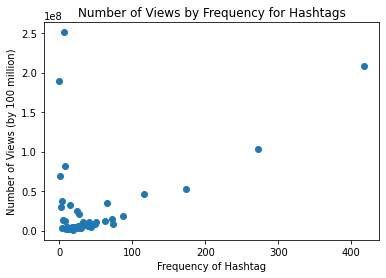

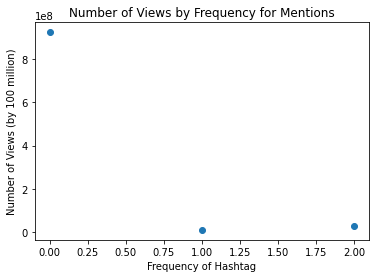

In [90]:
import matplotlib.pyplot as plt

#create two more dictionaries. These will store views by frequency for mentions and hashtags
views_by_freq_hashtag = dict()
views_by_freq_ment = dict()

#iterate through the tags by views, and get the frequency. Then set the views by frequency
# at the given tag to the corresponding view count 
for k, v in tags_by_views.items(): 
    for k2, v2 in tags.items():
        if k == k2:
            views_by_freq_hashtag[v2] = v
#set the notags to the frequency 0 in the dictionary
views_by_freq_hashtag[0] = notags

#iterate through the mentions by views, and get the frequency. Then set the mentions 
#by frequency at the given mention to the corresponding view count 
for k, v in ment_by_views.items(): 
    for k2, v2 in mentions.items():
        if k == k2:
            views_by_freq_ment[v2] = v
#set the nomentions to the frequency 0 in the dictionary
views_by_freq_ment[0] = nomentions

#create the views and frequencies lists to use as the x and y data
hashtag_views = []
hashtag_freqs = []
for k, v in views_by_freq_hashtag.items(): 
    hashtag_views.append(v)
    hashtag_freqs.append(k)

#create a scatterplot for views by frequency for the hashtags
plt.scatter(hashtag_freqs, hashtag_views) 

plt.xlabel('Frequency of Hashtag') 
plt.ylabel('Number of Views (by 100 million)') 
plt.title('Number of Views by Frequency for Hashtags') 
    
plt.show() 

#create the views and frequencies lists to use as the x and y data
mention_views = []
mention_freqs = []
for k, v in views_by_freq_ment.items(): 
    mention_views.append(v)
    mention_freqs.append(k)
    
#create a scatterplot for views by frequency for the mentions  
plt.scatter(mention_freqs, mention_views) 

plt.xlabel('Frequency of Hashtag') 
plt.ylabel('Number of Views (by 100 million)') 
plt.title('Number of Views by Frequency for Mentions') 
    
plt.show() 


From looking at these plots, we can say that the frequency of mentions has a negative correlation with the number of views. At 0, there are 800,000,000 views, but that decreases to less than 200,000,000 as the mention frequency increases to 1 and 2. However, we can see that the hashtag plot has two linear correlations, one would be that a small frequency for a hashtag increases views, and the other is that the number of views increases as the frequency of the hashtag increases. Based on this, we can reject that there is a connection between mentions and views. However, we still observe a positive relationship between views and hashtag frequency, so we will observe this in a bar plot. Now, we want to observe this trend in more depth. We can make a bar plot to see the true views according to frequency of hashtags. 

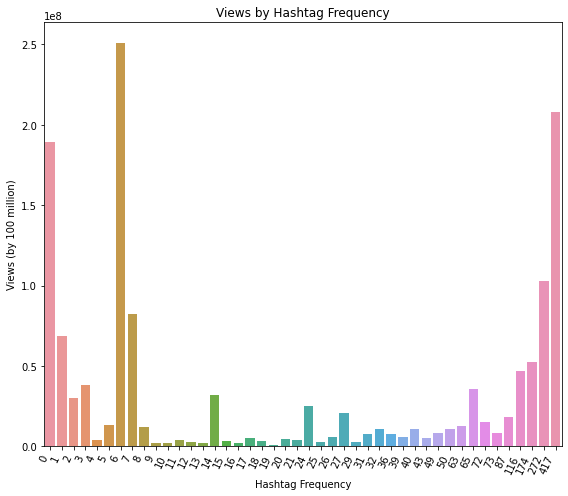

In [91]:
import seaborn as sns

#change the plot size to increase the x axis length
plt.figure(figsize=(8, 7))
#use the hashtag frequency as the x axis and the hashtag views as the y axis
ax = sns.barplot(x=hashtag_freqs, y=hashtag_views)
# edit the labels
plt.title('Views by Hashtag Frequency')
plt.xlabel('Hashtag Frequency')
plt.ylabel('Views (by 100 million)')
#rotate the labels to fit in the plot
ax.set_xticklabels(ax.get_xticklabels(), rotation=65, ha="right")
plt.tight_layout()


## Is There a Linear Relationship?
Now that we have proven some correlation between video views and hashtag frequency, we can perform a linear regression to see if this is the truth. To do this, we need to have an array of the frequencies, the x values, and our views, our y values. This will tell us if we have a strong or loose correlation, and if it is positive or negative. 

0.19537442312252873


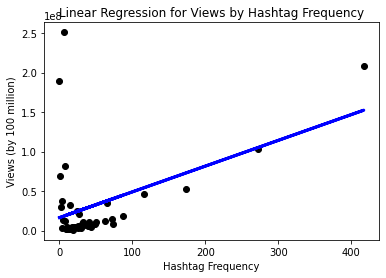

In [92]:
import numpy as np
from sklearn.linear_model import LinearRegression
#create a numpy array for the linear regression, and reshape it to create a 2D array, which
# is the form of array necessary for a linear regression
X = np.array(hashtag_freqs).reshape(-1, 1)
y = hashtag_views
#fit the regression using our data
reg = LinearRegression().fit(X, y)
#print our score, or the linear coefficient. 
print(reg.score(X, y))
y_pred = reg.predict(X)

plt.title('Linear Regression for Views by Hashtag Frequency')
plt.xlabel('Hashtag Frequency')
plt.ylabel('Views (by 100 million)')
plt.scatter(X, y, color="black")
plt.plot(X, y_pred, color="blue", linewidth=3)

Based on our regression score, we can say that there exists a positive correlation between hashtag frequency and video views, and we can see that demonstrated in our regression line. In layman's terms, this means that overall, as the frequency of a hashtag increases, the number of views on the video also increases. 